In [1]:
import os
import numpy as np
import pandas as pd
# from functools import lru_cache

## Read Data

In [4]:
products = pd.read_csv('products_train.csv')
products.head()

,id,locale,title,price,brand,color,size,model,material,author,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,NaN,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,NaN,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,NaN,Inhalt: 1 Stück


In [5]:
train = pd.read_csv('sessions_train.csv')
train.head()

,prev_items,next_item,locale
0,['B09W9FND7K' 'B09JSPLN1M'],B09M7GY217,DE
1,['B076THCGSG' 'B007MO8IME' 'B08MF65MLV' 'B001B...,B001B4THSA,DE
2,['B0B1LGXWDS' 'B00AZYORS2' 'B0B1LGXWDS' 'B00AZ...,B0767DTG2Q,DE
3,['B09XMTWDVT' 'B0B4MZZ8MB' 'B0B7HZ2GWX' 'B09XM...,B0B4R9NN4B,DE
4,['B09Y5CSL3T' 'B09Y5DPTXN' 'B09FKD61R8'],B0BGVBKWGZ,DE


In [6]:
test = pd.read_csv('sessions_test_task1.csv')
test.head()

,prev_items,locale
0,['B08V12CT4C' 'B08V1KXBQD' 'B01BVG1XJS' 'B09VC...,DE
1,['B00R9R5ND6' 'B00R9RZ9ZS' 'B00R9RZ9ZS'],DE
2,['B07YSRXJD3' 'B07G7Q5N6G' 'B08C9Q7QVK' 'B07G7...,DE
3,['B08KQBYV43' '3955350843' '3955350843' '39553...,DE
4,['B09FPTCWMC' 'B09FPTQP68' 'B08HMRY8NG' 'B08TB...,DE


## Preprocessing

In [7]:
def preprocessing(products, train, mylocale:str):
    products_subset = products[products['locale'] == mylocale].reset_index(drop=True)
    train_subset = train[train['locale'] == mylocale].reset_index(drop=True)
    products_subset = products_subset.drop(columns = ['locale'])
    train_subset = train_subset.drop(columns = ['locale'])
    # check missing values
    print(products_subset.isna().sum()/len(products_subset))
    print('##################################')
    print(train_subset.isna().sum()/len(train_subset))
    print('##################################')
    # check duplicates
    print("id duplicates: {}".format(products_subset.id.duplicated().sum()))
    print('##################################')
    # fillna ##TODO:
    products_subset = products_subset.fillna('')
    # check text length
    print("max_length of title: {}, desc: {}".format(max([len(i.split()) for i in products_subset.title]), max([len(i.split()) for i in products_subset.desc])))
    print('##################################')
    import re
    prev_items_list = list(train_subset.prev_items)
    prev_items_list_new = [re.sub('[^0-9A-Z ]+', '', items).split() for items in prev_items_list]
    train_subset['prev_items'] = prev_items_list_new
    prev_items_list_new_len = [len(prev_items) for prev_items in prev_items_list_new]
    print("max, min, avg, median of prev_items: {}, {}, {}, {}".format(max(prev_items_list_new_len), min(prev_items_list_new_len), np.mean(prev_items_list_new_len), np.median(prev_items_list_new_len)))
    return products_subset, train_subset

In [8]:
products.locale.unique()

array(['DE', 'JP', 'UK', 'ES', 'FR', 'IT'], dtype=object)

In [9]:
products_de, train_de = preprocessing(products, train, mylocale='DE')

id          0.000000
title       0.000000
price       0.000000
brand       0.018143
color       0.244751
size        0.423134
model       0.509640
material    0.428679
author      0.951936
desc        0.074713
dtype: float64
##################################
prev_items    0.0
next_item     0.0
dtype: float64
##################################
id duplicates: 0
##################################
max_length of title: 81, desc: 172
##################################
max, min, avg, median of prev_items: 156, 2, 4.35209048637054, 3.0


In [10]:
products_jp, train_jp = preprocessing(products, train, mylocale='JP')

id          0.000000
title       0.000020
price       0.000000
brand       0.013769
color       0.359675
size        0.408431
model       0.562810
material    0.554311
author      0.936895
desc        0.106739
dtype: float64
##################################
prev_items    0.0
next_item     0.0
dtype: float64
##################################
id duplicates: 0
##################################
max_length of title: 106, desc: 223
##################################
max, min, avg, median of prev_items: 474, 2, 4.48238671703848, 3.0


In [11]:
products_uk, train_uk = preprocessing(products, train, mylocale='UK')

id          0.000000
title       0.000000
price       0.000000
brand       0.008557
color       0.244112
size        0.398033
model       0.513117
material    0.402305
author      0.962222
desc        0.078488
dtype: float64
##################################
prev_items    0.0
next_item     0.0
dtype: float64
##################################
id duplicates: 0
##################################
max_length of title: 107, desc: 195
##################################
max, min, avg, median of prev_items: 201, 2, 4.121624353631128, 3.0


In [12]:
products_uk.head()

,id,title,price,brand,color,size,model,material,author,desc
0,B087LZNPHS,"SOCHOW Sherpa Fleece Throw Blanket, Double-Sid...",24.99,SOCHOW,Teal Green,127cm×150cm,,100% Polyester,,COLOR: The sherpa throw blanket is available i...
1,B08THFN1KX,Hippowarehouse Personalised Photo Printed Mous...,9.95,Hippowarehouse,White,240mm x 190mm x 60mm,50245-Mat-Perso,Rubber,,Competitively priced
2,0804185328,"500 Easy Recipes for Every Machine, Both Stove...",16.49,Clarkson Potter,White,,,,"Scarbrough, Mark",
3,B09VBKDBW6,"TYHJOY Mini Bag Sealer, Handheld Vacuum Heat S...",11.99,TYHJOY,Black,,FBA-sealer-black,Acrylonitrile Butadiene Styrene,,【AFTER-SALE】This handheld food heat sealer sho...
4,B096ZW8B49,Lucosobie Steering Wheel Lock - Car Anti-Theft...,26.99,Lucosobie,Black,,,Alloy Steel,,🔐【 Anti-Friction & Customer First】Each box of ...


In [13]:
products_uk.title[0]

'SOCHOW Sherpa Fleece Throw Blanket, Double-Sided Super Soft Luxurious Plush Blanket 127cm×150cm, Teal Green'

In [14]:
def combine_features(products_subset):
    new = []
    for i in range(len(products_subset)):
        a = ''
        if products_subset['title'][i]!='':
            if products_subset['brand'][i] in products_subset['title'][i]:
                a = products_subset['title'][i]
            else:
                a = products_subset['brand'][i] + ' ' + products_subset['title'][i]

            if products_subset['color'][i] in a:
                pass
            else:
                a = a + ' ' + products_subset['color'][i]
            
            if products_subset['size'][i] in a:
                pass
            else:
                a = a + ' ' + products_subset['size'][i]
                
            if products_subset['model'][i] in a:
                pass
            else:
                a = a + ' ' + products_subset['model'][i]
        new.append(a)
    products_subset['new_feature'] = new
    products_subset = products_subset[['id', 'price', 'new_feature', 'desc']]
    return products_subset

In [15]:
products_subset = combine_features(products_uk)

In [16]:
products_subset['new_feature_len'] = [len(i.split()) for i in products_subset.new_feature]
products_subset['desc_len'] = [len(i.split()) for i in products_subset.desc]

/tmp/ipykernel_2114/462355804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_subset['new_feature_len'] = [len(i.split()) for i in products_subset.new_feature]
/tmp/ipykernel_2114/462355804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_subset['desc_len'] = [len(i.split()) for i in products_subset.desc]


<AxesSubplot:>

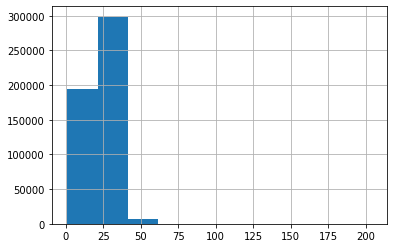

In [17]:
products_subset['new_feature_len'].hist()

In [18]:
np.percentile(products_subset['new_feature_len'], 95)

37.0

<AxesSubplot:>

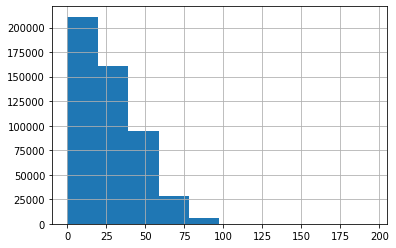

In [19]:
products_subset['desc_len'].hist()

In [20]:
np.percentile(products_subset['desc_len'], 95)

63.0

In [49]:
products_subset

,id,price,new_feature,desc,new_feature_len,desc_len
0,B087LZNPHS,24.99,"SOCHOW Sherpa Fleece Throw Blanket, Double-Sid...",COLOR: The sherpa throw blanket is available i...,14,38
1,B08THFN1KX,9.95,Hippowarehouse Personalised Photo Printed Mous...,Competitively priced,26,2
2,0804185328,16.49,Clarkson Potter 500 Easy Recipes for Every Mac...,,15,0
3,B09VBKDBW6,11.99,"TYHJOY Mini Bag Sealer, Handheld Vacuum Heat S...",【AFTER-SALE】This handheld food heat sealer sho...,29,61
4,B096ZW8B49,26.99,Lucosobie Steering Wheel Lock - Car Anti-Theft...,🔐【 Anti-Friction & Customer First】Each box of ...,21,46
...,...,...,...,...,...,...
500175,B08D7KW8VK,9.99,TOMHOUSEE Anime Cosplay Short Straight Hair Wi...,,21,0
500176,B073WXLXR9,8.99,CRYSTALS Crystals NEW brilliant ink twister bi...,,16,0
500177,1529393833,4.50,"Hodder Paperbacks Before I Do: the new, funny ...",,20,0
500178,B0B3TJ1NDN,4.49,"AA-TECH Black iPhone Charger Cable, iPhone Cha...",Added Protection: An additional layer of prote...,26,30


In [21]:
# for idx in range(len(products_subset)):
#     if products_subset['desc'][idx]=='':
#         print(idx)

In [22]:
# products_subset.isna().sum()

In [23]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [24]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
new_features = list(products_subset.new_feature)
new_features_embeddings = model.encode(new_features, show_progress_bar = True)

Batches: 100%|████████████████████████████| 15631/15631 [03:08<00:00, 82.91it/s]


In [ ]:
# df = pd.DataFrame(new_features_embeddings, 
#                   columns = ['new_dim{}'.format(i) for i in range(1, new_features_embeddings.shape[1]+1)], 
#                   index = products_subset.id)
# df.to_csv('new_feature_embedding.csv')

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_features_embeddings_ss = scaler.fit_transform(new_features_embeddings)

In [28]:
df = pd.DataFrame(new_features_embeddings_ss, 
                  columns = ['new_ss_dim{}'.format(i) for i in range(1, new_features_embeddings_ss.shape[1]+1)], 
                  index = products_subset.id)
df.to_csv('new_feature_embedding_ss2.csv')

In [29]:
df1 = products_subset[products_subset['desc'] != '']
df2 = products_subset[products_subset['desc'] == '']

In [30]:
descs = list(df1.desc)
descs_embeddings = model.encode(descs, show_progress_bar = True)
descs_embeddings_ss = scaler.fit_transform(descs_embeddings)

Batches: 100%|████████████████████████████| 14404/14404 [02:58<00:00, 80.63it/s]


In [37]:
# df11 = pd.DataFrame(descs_embeddings, 
#                     columns = ['desc_dim{}'.format(i) for i in range(1, descs_embeddings.shape[1]+1)], 
#                     index = df1.id)
# df22 = pd.DataFrame(columns = ['desc_dim{}'.format(i) for i in range(1, descs_embeddings.shape[1]+1)], 
#                     index = df2.id)
# df = pd.concat([df11, df22])
# df = df.fillna(value = dict(zip(['desc_dim{}'.format(i) for i in range(1, descs_embeddings.shape[1]+1)], 
#          descs_embeddings.mean(axis=0).tolist())))
# df.to_csv('desc_embedding.csv')

In [31]:
df11 = pd.DataFrame(descs_embeddings_ss, 
                    columns = ['desc_ss_dim{}'.format(i) for i in range(1, descs_embeddings_ss.shape[1]+1)], 
                    index = df1.id)
df22 = pd.DataFrame(columns = ['desc_ss_dim{}'.format(i) for i in range(1, descs_embeddings_ss.shape[1]+1)], 
                    index = df2.id)
df = pd.concat([df11, df22])
df = df.fillna(value = dict(zip(['desc_ss_dim{}'.format(i) for i in range(1, descs_embeddings_ss.shape[1]+1)], 
         descs_embeddings_ss.mean(axis=0).tolist())))
df.to_csv('desc_embedding_ss2.csv')

In [32]:
df_new_ss = pd.read_csv('new_feature_embedding_ss2.csv', index_col='id')
df_desc_ss = pd.read_csv('desc_embedding_ss2.csv', index_col='id')

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = products_subset[['id', 'price']]
df['prices_ss'] = scaler.fit_transform(df.price.values.reshape(-1, 1))
df = df.drop(columns=['price'])
df = df.set_index('id', drop=True)
df = df.merge(df_new_ss, how='left', left_index=True, right_index=True)
df = df.merge(df_desc_ss, how='left', left_index=True, right_index=True)

/tmp/ipykernel_2114/2593745433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices_ss'] = scaler.fit_transform(df.price.values.reshape(-1, 1))


In [34]:
df

,prices_ss,new_ss_dim1,new_ss_dim2,new_ss_dim3,new_ss_dim4,new_ss_dim5,new_ss_dim6,new_ss_dim7,new_ss_dim8,new_ss_dim9,...,desc_ss_dim375,desc_ss_dim376,desc_ss_dim377,desc_ss_dim378,desc_ss_dim379,desc_ss_dim380,desc_ss_dim381,desc_ss_dim382,desc_ss_dim383,desc_ss_dim384
id,,,,,,,,,,,,,,,,,,,,,
B087LZNPHS,-0.230721,0.990748,1.429005,0.412018,-0.140653,0.973499,-0.787728,-0.854372,0.180810,-0.970535,...,1.311731e-02,1.396919e+00,6.107159e-01,-1.284220e+00,2.285826e-01,-2.165469e-01,1.444736e-02,-8.200645e-02,8.174422e-01,7.161797e-01
B08THFN1KX,-0.230723,-0.341381,-0.412217,0.916874,-1.145486,0.119803,-0.239333,-1.190129,-0.228534,0.222329,...,1.723871e-01,-5.296980e-01,-1.626963e+00,1.545590e-01,-1.974411e+00,1.207650e-01,-2.297987e-01,-4.589809e+00,-3.090238e-01,1.055402e+00
0804185328,-0.230722,-0.769016,-0.811786,-0.636931,0.757118,-0.267751,-0.432239,-1.368383,-0.101401,-0.097942,...,3.405417e-08,-5.282111e-09,-5.055485e-09,-8.610643e-09,-1.149879e-09,2.159062e-09,-2.372046e-08,1.388921e-08,1.346995e-08,-1.724560e-08
B09VBKDBW6,-0.230722,-0.814427,-0.659305,-0.325889,0.306937,1.171476,-1.111312,0.676984,0.054761,-0.993952,...,1.174515e-01,-1.786944e-01,-4.492902e-01,4.346626e-01,2.835621e-01,2.156699e-01,-6.682479e-01,-7.483075e-01,-1.319620e+00,4.442951e-01
B096ZW8B49,-0.230721,-0.090327,-0.669246,-1.419425,-1.445191,0.208564,0.513090,-0.061669,-1.167921,1.691256,...,-6.410451e-01,1.188556e+00,-9.700338e-02,1.715740e-01,7.489600e-01,-1.010548e+00,-8.943622e-01,-8.642548e-02,4.692398e-01,7.989194e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B08D7KW8VK,-0.230723,0.780986,-1.328658,1.042464,-0.557510,-1.036534,0.198816,1.177962,-2.203415,0.565511,...,3.405417e-08,-5.282111e-09,-5.055485e-09,-8.610643e-09,-1.149879e-09,2.159062e-09,-2.372046e-08,1.388921e-08,1.346995e-08,-1.724560e-08
B073WXLXR9,-0.230723,-0.832050,-0.179438,-1.088578,0.429322,-1.307861,-0.689231,1.535001,-0.969123,-0.681763,...,3.405417e-08,-5.282111e-09,-5.055485e-09,-8.610643e-09,-1.149879e-09,2.159062e-09,-2.372046e-08,1.388921e-08,1.346995e-08,-1.724560e-08
1529393833,-0.230723,-0.941442,-0.468743,-0.444952,0.822165,0.679310,0.623491,-1.903994,0.192920,1.481459,...,3.405417e-08,-5.282111e-09,-5.055485e-09,-8.610643e-09,-1.149879e-09,2.159062e-09,-2.372046e-08,1.388921e-08,1.346995e-08,-1.724560e-08


In [35]:
combined_embeddings = np.column_stack([df[i].values for i in df.columns])

## Dimension Reduction

### UMAP

In [41]:
! pip install umap-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [48]:
umap_transformer.fit(combined_embeddings)

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [42]:
import umap.umap_ as umap

In [44]:
# import umap
# import umap.cuda
import time
start=time.time()
x=combined_embeddings[:10000]
# Initialize UMAP transformer
umap_transformer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform the data using UMAP
x_umap = umap_transformer.fit_transform(x)
print("{} seconds".format(time.time()-start))


14.252882957458496 seconds


In [45]:
# Print the shape of the transformed data
print(x_umap.shape)

(10000, 2)


In [47]:
# 14*50/60

### TSNE

In [34]:
from sklearn.manifold import TSNE
import time
start=time.time()
# Use t-SNE to reduce the dimensionality of the embeddings to 2D
tsne = TSNE(n_components=2, perplexity=250000, learning_rate=200)
embeddings_2d = tsne.fit_transform(combined_embeddings)
print("{} seconds".format(time.time()-start))
# Plot the embeddings in 2D
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=10, alpha=0.5)
plt.show()

KeyboardInterrupt: 

### PCA

252


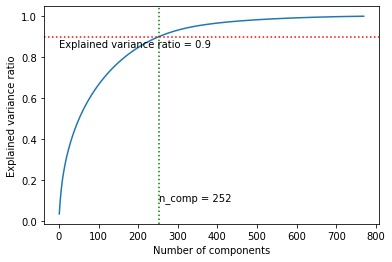

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# combined_embeddings_ss = scaler.fit_transform(combined_embeddings)

pca = PCA()

pca.fit(combined_embeddings)

# Plot explained variance ratio
threshold = 0.9
cumsum = np.cumsum(pca.explained_variance_ratio_)
idx = np.where(cumsum >= threshold)[0][0]
print(idx+1)
plt.plot([i for i in range(1, len(cumsum)+1)], cumsum)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.axhline(y=threshold, color='r', linestyle=':')
plt.axvline(x=idx+1, color='green', linestyle=':')\
# , label = 'axhline - % of Explained variance ratio = 0.9'
# , label = 'axvline - % of Number of components = {}'.format(idx+1)
# plt.legend(loc = 'best')
plt.annotate('n_comp = {}'.format(idx+1), (idx+1+1, 0.1))
plt.annotate('Explained variance ratio = {}'.format(threshold), (0, threshold-0.05))
plt.show()

In [39]:
from sklearn.decomposition import PCA

# Create PCA object
pca = PCA(n_components=idx+1)

# Fit and transform data using PCA
combined_embeddings_pca = pca.fit_transform(combined_embeddings)

# Print transformed data
# print(combined_embeddings_pca)


In [50]:
combined_embeddings_pca[0].shape

(252,)

In [52]:
products_final = pd.DataFrame(combined_embeddings_pca, 
                  columns = ['combined_embedding_pca{}'.format(i) for i in range(1, combined_embeddings_pca.shape[1]+1)], 
                  index = df.index)

In [54]:
products_final

,combined_embedding_pca1,combined_embedding_pca2,combined_embedding_pca3,combined_embedding_pca4,combined_embedding_pca5,combined_embedding_pca6,combined_embedding_pca7,combined_embedding_pca8,combined_embedding_pca9,combined_embedding_pca10,...,combined_embedding_pca243,combined_embedding_pca244,combined_embedding_pca245,combined_embedding_pca246,combined_embedding_pca247,combined_embedding_pca248,combined_embedding_pca249,combined_embedding_pca250,combined_embedding_pca251,combined_embedding_pca252
id,,,,,,,,,,,,,,,,,,,,,
B087LZNPHS,4.039271,-0.652731,2.721420,0.450438,0.398846,2.999696,-7.826216,-2.744508,0.379791,0.373735,...,0.899695,-0.514701,-0.932217,0.103944,-1.047758,-0.715263,1.011219,-1.087907,-0.828549,1.249943
B08THFN1KX,0.968958,-2.264875,3.204812,-0.437812,5.329442,-3.764193,1.877295,1.771877,2.270880,3.494887,...,-1.120311,1.199418,-0.830210,0.859823,-0.294982,-0.706673,-0.404984,-0.741793,0.728167,-0.927216
0804185328,-2.826471,1.021708,-5.779205,-0.057654,3.148926,3.044957,2.281960,0.294179,5.199770,-1.529061,...,-0.317207,-0.483425,-0.830234,-0.183428,0.257771,0.268426,0.993592,-0.051243,-0.300446,-1.027526
B09VBKDBW6,-3.880456,-0.079916,-1.340898,-4.391811,-1.432632,0.062855,-0.347614,-2.779915,-4.374343,0.072236,...,0.165172,0.136977,-0.369938,-0.105013,0.462548,-0.143357,-0.607345,0.284784,-0.440136,0.064827
B096ZW8B49,-4.762424,-3.123901,1.614649,-2.104695,-3.562451,-2.016349,6.520696,-1.744605,-0.399182,-3.223507,...,0.367554,0.488380,0.218503,-0.948107,0.387980,-0.640476,0.186700,0.715165,0.276432,0.076459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B08D7KW8VK,6.313017,1.458211,5.117764,2.092569,-4.540842,-2.564632,-2.909138,5.214635,-1.006375,1.766736,...,0.827354,-0.685734,-0.367799,0.558744,-0.539557,-0.553344,0.999393,-0.630561,-0.100688,-0.581938
B073WXLXR9,3.381487,-0.512567,-2.408177,4.193507,-0.353663,-0.080643,4.284539,-0.254724,0.294753,2.440591,...,0.776214,0.462111,0.384153,0.065993,-0.150741,-0.633430,0.243705,-0.564117,-0.185190,1.366173
1529393833,2.460724,0.265960,-2.245184,-0.012788,2.683867,-0.858861,-0.533781,-0.625940,7.076491,-0.609406,...,-0.149958,-1.718585,1.103841,0.234413,-0.028374,-0.230239,-0.865410,-0.435087,0.326061,-0.017557


In [55]:
products_final.to_csv('products_final2.csv')

In [56]:
# products_subset_toy = products_subset.dropna()[:100]
# products_subset_toy['combined_embeddings_pca'] = list(combined_embeddings_pca)
# products_final = products_subset_toy[['id', 'combined_embeddings_pca']]

## Extract Last 3 items

In [57]:
train_subset = train_uk

In [58]:
train_subset['prev_item1'] = [i[-1] if len(i)>0 else '' for i in train_subset.prev_items]
train_subset['prev_item2'] = [i[-2] if len(i)>1 else '' for i in train_subset.prev_items]
train_subset['prev_item3'] = [i[-3] if len(i)>2 else '' for i in train_subset.prev_items]

In [59]:
train_subset.head()

,prev_items,next_item,prev_item1,prev_item2,prev_item3
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ,B07Y21LDJX,B07J4WF8VH,B0BFDR9X13
1,"[B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6,B07GZW3P4W,B07FM2GLNQ,
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC,B07DDL77RY,B07DDL77RY,B0021L95HU
3,"[B0B2WSZYL2, B000I8XZ7O]",B000I90TAO,B000I8XZ7O,B0B2WSZYL2,
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,B09HLDN8W1,B00OI6NQUI,B00LW1APOC


In [2]:
train_final = train_subset.drop(columns = ['prev_items'])
# train_final = train_subset
for col in train_final.columns:
    train_final = train_final.merge(products_final, left_on = col, right_on = 'id', how = 'left')
    train_final = train_final.drop(columns = ['id'])
    train_final = train_final.rename(columns={'combined_embedding_pca':col+'_feature'})

In [ ]:
train_final.head()

In [ ]:
train_final.isna().sum()/len(train_final)